# **Edge Detection**
1. Intensity Edge
2. 
3. Texture Edge

In [2]:
#import Libraries
import sys
import numpy as np
import matplotlib.pyplot as plt

#import utilities
import image_utils as utils


## **What is edge detection?**

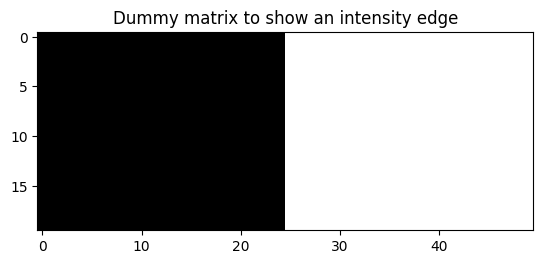

In [3]:
#create dummy matrix and show it as an image

mat=np.zeros((20,50))
mat[:,25:] = 1

plt.imshow(mat, cmap = 'gray')
plt.title('Dummy matrix to show an intensity edge')
plt.show()

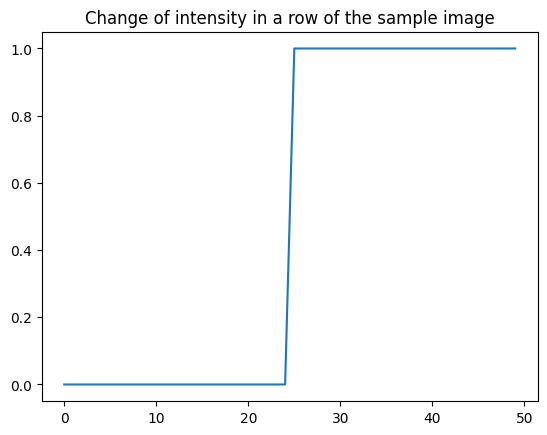

In [4]:
# Plot the intensity levels of a single row

plt.plot(mat[1, :])
plt.title('Change of intensity in a row of the sample image')
plt.show()

## **Simple edge detection**

In [5]:
from numpy import diff

In [6]:
dx = 2
mat_prime = diff(mat[1, :])/dx

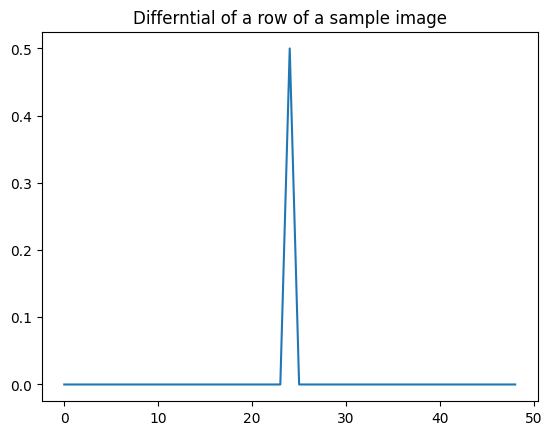

In [7]:
plt.plot(mat_prime)
plt.title('Differntial of a row of a sample image')
plt.show()

### 1D-filter [-1, 1]

In [8]:
vec = mat[1, :]
kernel = [-1,1]
new_vec = []
# print(len(vec))
# print(len(kernel))
for i in range(len(vec) - len(kernel) + 1):
    # print(vec[i], vec[i+20])
    op = vec[i] * kernel[0] + vec[i+1] * kernel[1]
    new_vec.append(op)

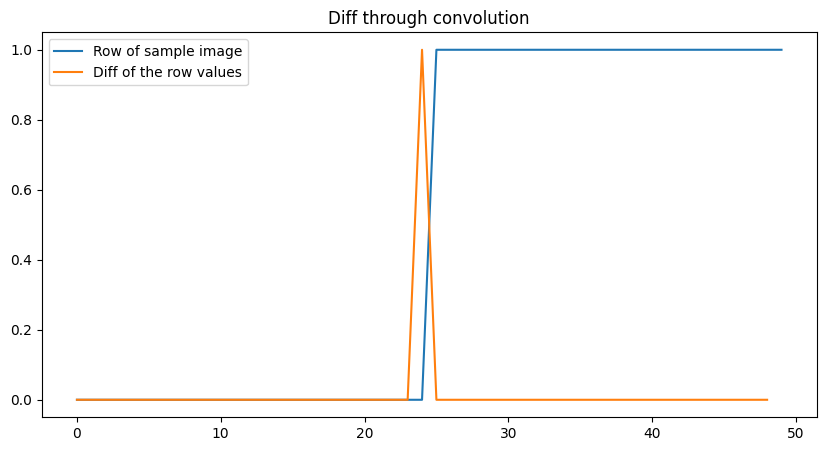

In [9]:
# Plot
f, ax = plt.subplots(1, 1, figsize = (10,5))
# print(f, ax)
plt.plot(vec, label = 'Row of sample image')
plt.plot(new_vec, label = 'Diff of the row values')
plt.legend()
plt.title('Diff through convolution')
plt.show()

### Robot 

In [10]:
import cv2

In [11]:
#Apple filter2D operation

kernel  = np.array([[0, 1], [-1, 0]])
print(kernel)

[[ 0  1]
 [-1  0]]


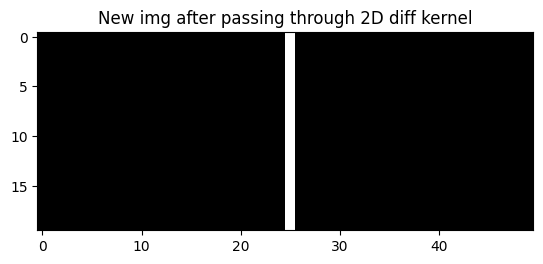

In [12]:
new_img = cv2.filter2D(mat, -1, kernel)  #-1 means to keep the input and output image size same

plt.imshow(new_img, cmap= 'gray')
plt.title('New img after passing through 2D diff kernel')
plt.show()

### **Advanced kernels for edge detection**

1. Prewitt operator
2. Sobel operator

Check for doc

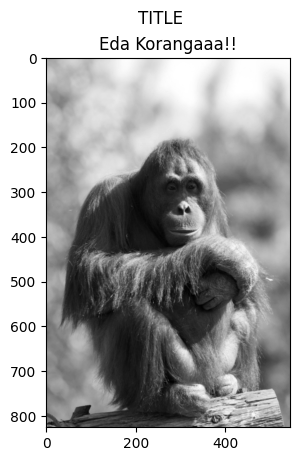

In [13]:
# read a sample image

# img = cv2.imread('Images\Sample_1.png')                                       #Importing image
img = cv2.cvtColor(cv2.imread('Images\Sample_1.png'), cv2.COLOR_BGR2RGB)        #Import Image and converting color
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                  #Convert image to black and white


# utils.showImage([img], ['Eda Korangaaa'])
utils.showImage([img_bw], ['Eda Korangaaa!!'], 'TITLE', scale=True)

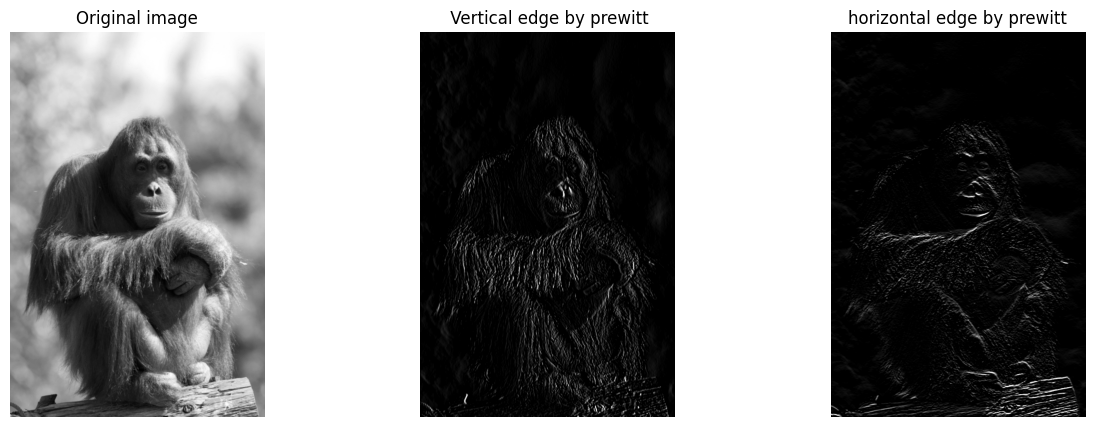

In [15]:
#Prewitt operator
#Complete the function

prewittx = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

prewitty = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])

vertical_edge = cv2.filter2D(img_bw, -1, prewittx)
horizontal_edge = cv2.filter2D(img_bw, -1, prewitty)

# cv2.imshow('Original Image', img_bw)
# cv2.imshow('Vertical Edges (Prewitt)', vertical_edge)
# cv2.imshow('Horizontal Edges (Prewitt)', horizontal_edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#Show Image: orignal, vertical, horizontal by prewitt
utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Original image', ' Vertical edge by prewitt', 'horizontal edge by prewitt'])
# utils.showImage([img_bw],['Original Image'])
# utils.showImage([vertical_edge],['Vertical Edge'],scale=True)
# utils.showImage([horizontal_edge],['Horizontal Edge'], scale= True)

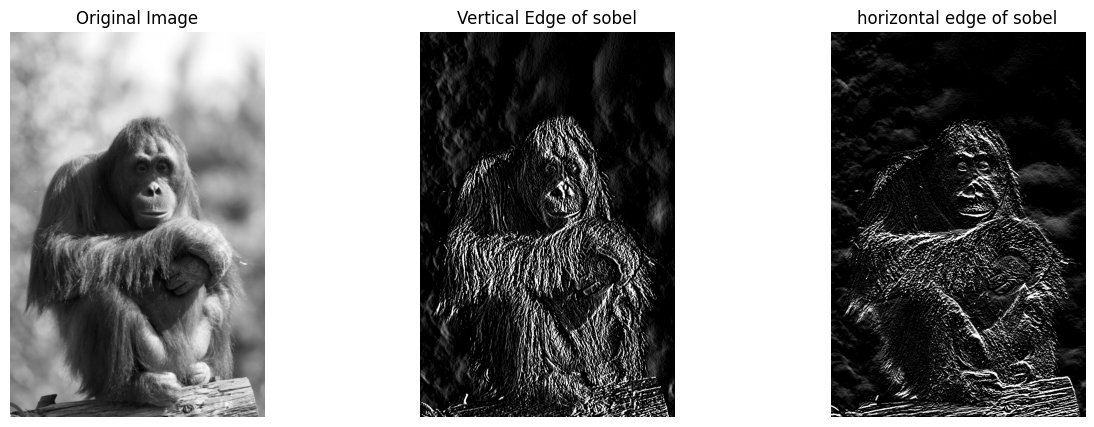

In [17]:
# Sobel operator

sobelx = np.array([[-1, 0, 1],
                   [-10, 0, 10],
                   [-1, 0, 1]])

sobely = np.array([[-1, -10, -1],
                   [0, 0, 0],
                   [1, 10, 1]])

vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Original Image' , 'Vertical Edge of sobel', 'horizontal edge of sobel'])
# utils.showImage([vertical_edge], ['Vertical Edge'], 'Sobel Operator')
# utils.showImage([horizontal_edge], ['Vertical Edge'], 'Sobel Operator')

#Show Image: orignal, vertical, horizontal by Sobel operator

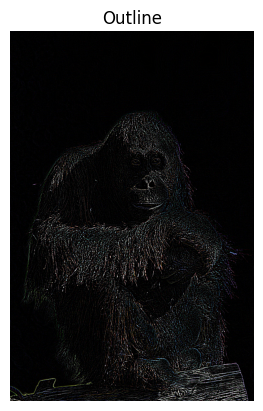

In [ ]:
# Outline Kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

outline = cv2.filter2D(img, -1, kernel)
# horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

# utils.showImage([img_bw], ['Original Image'])
utils.showImage([outline], ['Outline'])
# utils.showImage([horizontal_edge], ['Vertical Edge'], 'Sobel Operator')

## Demo example:  edge detection

In [18]:
import requests

from PIL import Image
from io import BytesIO


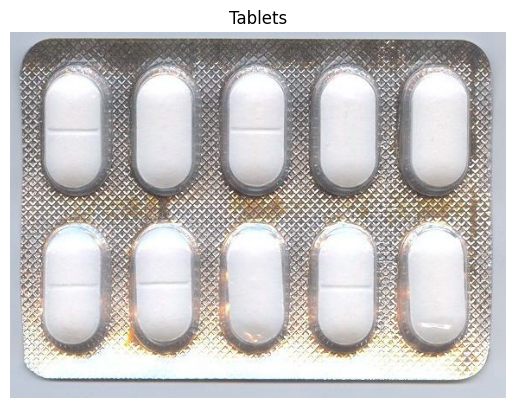

In [22]:
#Read an Image

# response = requests.get('https://i-stack.imgur.com/uk0kD.jpg')
# img = np.asarray(Image.open(BytesIO(response)))
img = cv2.imread('Images/pack.jpg')  

img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        

utils.showImage([img], ['Tablets'])

## Problem statement
Defect detetction of the tablets in the pack

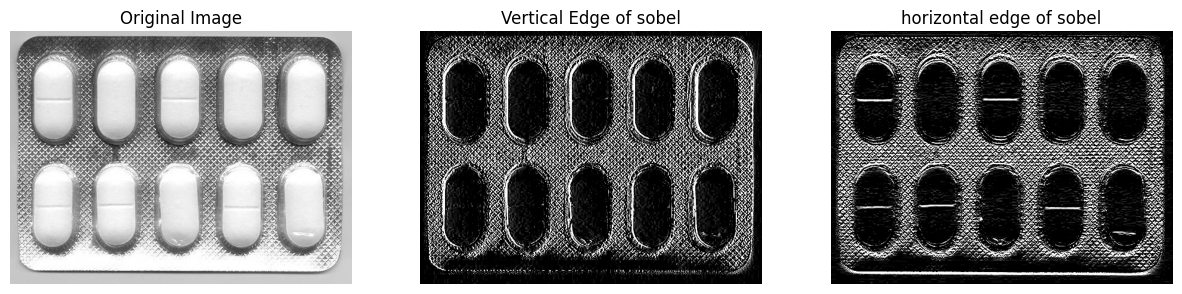

In [23]:
# Sobel operator

sobelx = np.array([[-1, 0, 1],
                   [-10, 0, 10],
                   [-1, 0, 1]])

sobely = np.array([[-1, -10, -1],
                   [0, 0, 0],
                   [1, 10, 1]])

vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Original Image' , 'Vertical Edge of sobel', 'horizontal edge of sobel'])
# utils.showImage([vertical_edge], ['Vertical Edge'], 'Sobel Operator')
# utils.showImage([horizontal_edge], ['Vertical Edge'], 'Sobel Operator')

#Show Image: orignal, vertical, horizontal by Sobel operator

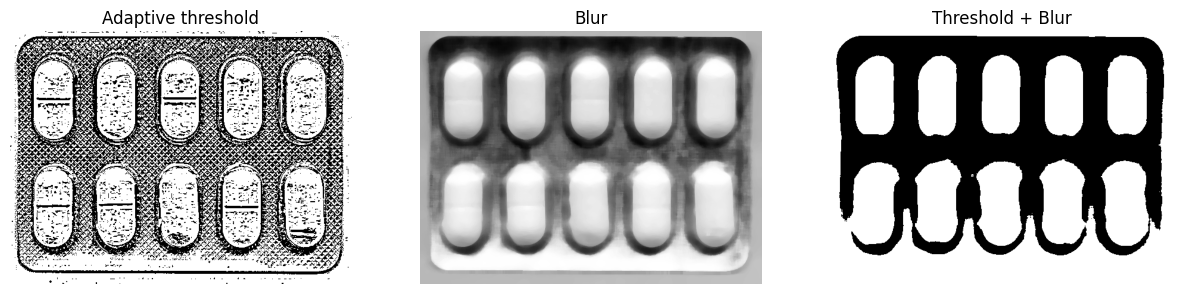

In [28]:
img_thr = cv2.adaptiveThreshold(img_bw, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
img_blur = cv2.medianBlur(img_bw, 11)

ret, img_blur_th = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

utils.showImage([img_thr, img_blur, img_blur_th], ['Adaptive threshold' , 'Blur', 'Threshold + Blur'])

## TO DO

1. Calculate countours
2. Creating bounding boxes around blobs detected

Check Tutorial of OPENCV

Expected result: defected tablets bound with a red rectangle, non defected --with green BB

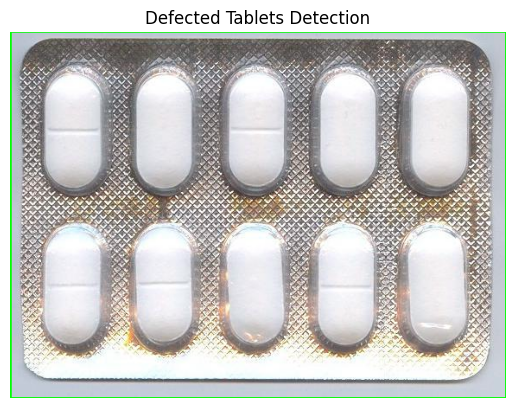

In [30]:
# define countours

contours, _ = cv2.findContours(img_blur_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Define criteria for defective tablets (example criteria: small area)
    area = cv2.contourArea(contour)
    if area < 500:  # Assuming defective if the area is less than 500
        color = (0, 0, 255)  # Red for defective
    else:
        color = (0, 255, 0)  # Green for non-defective
    
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

utils.showImage([img], ['Defected Tablets Detection'])
# crop to single tablet
# and find vertica and horsontal tablet then do the bounding boxws